In [1]:
from mpl_toolkits.basemap import Basemap
import netCDF4
from pylab import *
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from datetime import datetime
import math as math
%matplotlib inline

In [2]:
urlpath='http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/'
filen='JPL.ECCO2.SSH.1440x720.20140917.nc'
url=urlpath + filen
print url
nc=netCDF4.Dataset(url)
print nc.variables.keys()

http://mrtee.europa.renci.org:8080/thredds/dodsC/DataLayers/JPL.ECCO2.SSH.1440x720.20140917.nc
[u'TIME', u'LATITUDE_T', u'LONGITUDE_T', u'SSH']


In [12]:
lon=nc.variables['LONGITUDE_T'][:]
lon = lon - 180 
lat=nc.variables['LATITUDE_T'][:]
lon, lat=meshgrid(lon,lat)

var=nc.variables['SSH']

ssh=var[:]                # get data
ssh=np.squeeze(ssh)       # remove singleton dimension

# swap east and west hemispheres
i=np.size(lon,1)/2
ssh = column_stack((ssh[:,i:i*2],ssh[:,0:i]))

# mask out land
ssh = np.ma.array(ssh,mask=ssh<-999)
print np.nanmin(ssh[:])
print np.nanmax(ssh[:])

-2.37465
1.48579


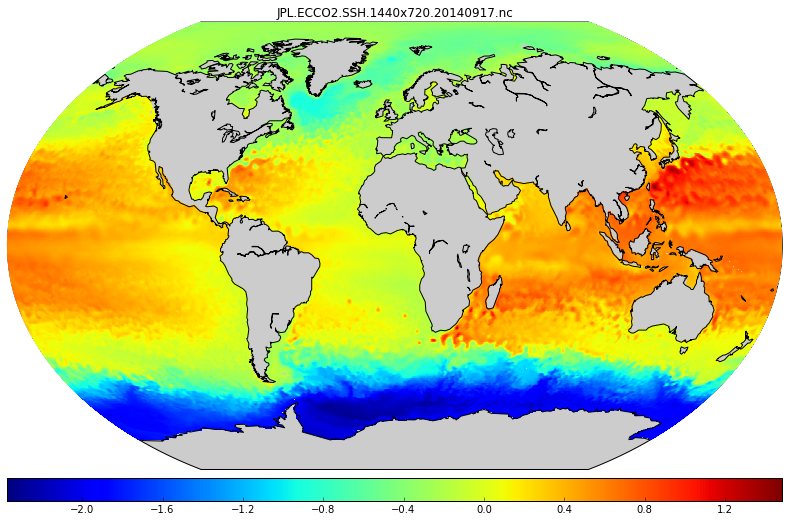

In [13]:
m = Basemap(projection='kav7',lon_0=Lo1,resolution='c')
fig = plt.figure(figsize=(14,7), dpi=144)
ax = fig.add_axes([0.05,0.05,0.95,0.95])
m.drawmapboundary(fill_color='0.8')
m.drawcoastlines(linewidth=1.)
im1 = m.pcolormesh(lon,lat,ssh,shading='flat',cmap=plt.cm.jet,latlon=True)
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")

ax.set_title(filen)